# Visualization Case Study

In this case study, I will be working on diamond dataset regarding the prices and attributes of 54,000 round-cut diamonds. <br>
I will start from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. <br>
Finally, I will work on polishing the plots so that the main points can be clearly conveyed to others. 

## Table of Contents
<ul>
<li><a href='#Dataset_Overview'>Dataset Overview</a></li>
<li><a href='#Uni'>Univariate Exploration</a></li>
<li><a href='#Bivariate_Exploration'>Bivariate Exploration</a></li>
<li><a href='#Multivariate_Exploration'>Multivariate Exploration</a></li>
<li><a href='#Explanatory_Polishing'>Explanatory Polishing</a></li>
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

<a id='Dataset_Overview'></a>
## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id='Uni'></a>
## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

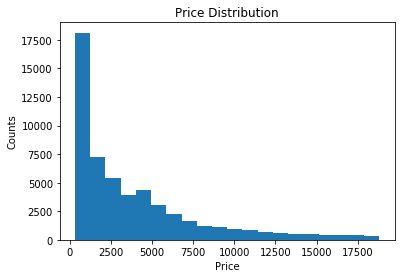

In [8]:
# univariate plot of diamond prices
plt.hist(data = diamonds, x='price', bins=20);
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price Distribution');

> Throughout this case study, you'll see comments in Markdown cells like the one below, where the text has been colored in white. Unlike the exercises in earlier lessons, a reference plot will not be provided: you'll need to assess on your own whether or not your plot matches the comments. To view these comments, you can either highlight the text, or double click the Markdown cell. Remove or change the 'color=white' style on the text to un-spoiler the commentary.

Price distribution comment 1: <span style="color:blue">You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.</span>

In [10]:
# Calculation for bin sizes
np.log10(diamonds['price'].describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

In [21]:
bins = 10 ** np.arange(2.5, 4.3+0.05, 0.05);
ticks = [300, 600, 1200, 2400, 4800, 9600, 19200]

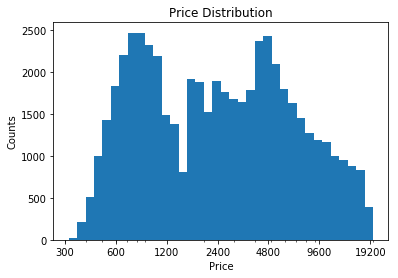

In [22]:
# Log scaling
plt.hist(data = diamonds, x='price', bins=bins);
plt.xscale('log')
plt.xlabel('Price')
plt.ylabel('Counts')
plt.xticks(ticks, ticks)
plt.title('Price Distribution');

Price distribution comment 2: <span style="color:blue">Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

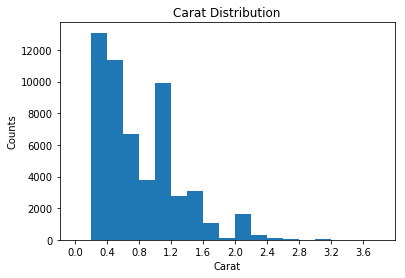

In [31]:
# univariate plot of carat weights
bins = np.arange(0, 4, 0.2)
ticks = np.arange(0, 4, 0.4)
ticks_label = ['{:0.1f}'.format(v) for v in ticks]
plt.hist(data = diamonds, x='carat', bins=bins);
plt.xlabel('Carat')
plt.ylabel('Counts')
plt.xticks(ticks, ticks_label, rotation=0)
plt.title('Carat Distribution');

Carat distribution comment: <span style="color:blue">You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [52]:
diamonds.cut.unique(), diamonds.color.unique(), diamonds.clarity.unique()

([Ideal, Premium, Good, Very Good, Fair]
 Categories (5, object): [Ideal < Premium < Very Good < Good < Fair],
 [E, I, J, H, F, G, D]
 Categories (7, object): [D < E < F < G < H < I < J],
 array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object))

In [53]:
cut_list = ['Ideal', 'Premium',  'Very Good', 'Good', 'Fair']
cut_order = pd.api.types.CategoricalDtype(ordered=True, categories=cut_list)

diamonds['cut'] = diamonds['cut'].astype(cut_order);

color_list = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_order = pd.api.types.CategoricalDtype(ordered=True, categories=color_list)

diamonds['color'] = diamonds['color'].astype(color_order);

clarity_list = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
clarity_order = pd.api.types.CategoricalDtype(ordered=True, categories=clarity_list)

diamonds['clarity'] = diamonds['clarity'].astype(clarity_order);

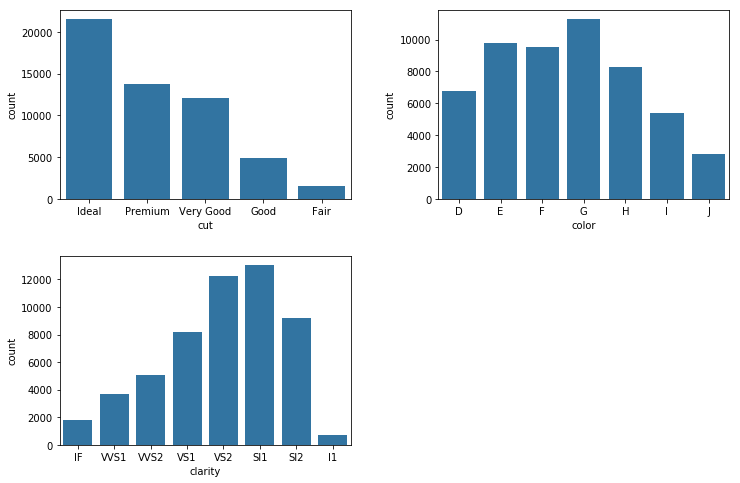

In [54]:
# univariate plots of cut, color, and clarity grades
plt.figure(figsize=[12, 8])
plt.subplot(2,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data=diamonds, x='cut', color=base_color);

plt.subplot(2,2,2)
sb.countplot(data=diamonds, x='color', color=base_color);

plt.subplot(2,2,3)
sb.countplot(data=diamonds, x='clarity', color=base_color);

plt.subplots_adjust(wspace=0.3, hspace=0.3)

General categorical feature comment: <span style="color:blue">Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span style="color:blue">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span style="color:blue">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span style="color:BLUE">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

<a id='Bivariate_Exploration'></a>
## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

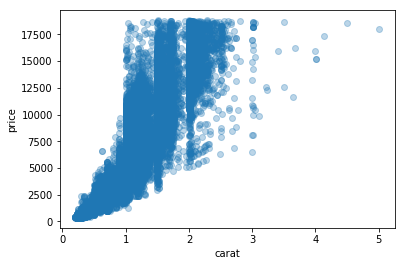

In [7]:
# bivariate plot of price vs. carat
sb.regplot(data=diamonds, x='carat', y='price', fit_reg=False, 
           scatter_kws={'alpha':0.3});

Price vs. Carat comment 1: <span style="color:blue">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>

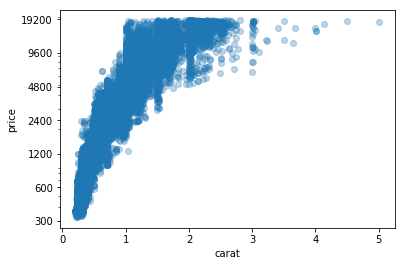

In [11]:
#based on previous univariate plot of price, tansfer it to log
y_ticks = [300, 600, 1200, 2400, 4800, 9600, 19200]
sb.regplot(data=diamonds, x='carat', y='price', fit_reg=False, 
           scatter_kws={'alpha':0.3});
plt.yscale('log');
plt.yticks(y_ticks, y_ticks);

Price vs. Carat comment 2: <span style="color:blue">Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.</span>

In [17]:
diamonds.carat.apply(cube_root).min(), diamonds.carat.apply(cube_root).max()

(0.5848035476425733, 1.711115171495147)

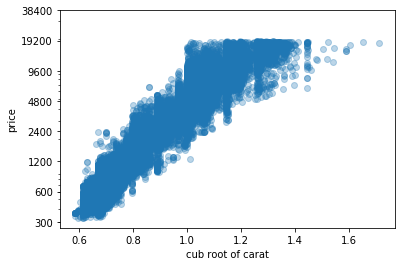

In [25]:
def cube_root(x):
    return np.cbrt(x)

y_ticks = [300, 600, 1200, 2400, 4800, 9600, 19200, 38400]
sb.regplot(x=diamonds.carat.apply(cube_root), y=diamonds.price, fit_reg=False, 
           scatter_kws={'alpha':0.3});
plt.yscale('log');
plt.yticks(y_ticks, y_ticks);
plt.xlabel('cub root of carat');

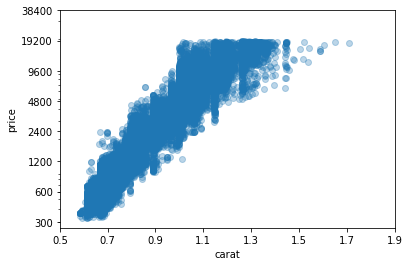

In [28]:
def cube_root(x):
    return np.cbrt(x)

y_ticks = [300, 600, 1200, 2400, 4800, 9600, 19200, 38400]
sb.regplot(x=diamonds.carat.apply(cube_root), y=diamonds.price, fit_reg=False, 
           scatter_kws={'alpha':0.3});
plt.yscale('log');
plt.yticks(y_ticks, y_ticks);
tick_loc = np.arange(0.5, diamonds.carat.apply(cube_root).max()+0.2, 0.2)
tick_label = ['{:0.1f}'.format(v) for v in tick_loc]

plt.xticks(tick_loc, tick_label);

Price vs. Carat comment 3: <span style="color:blue">One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.</span>

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

C:\Users\yumen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


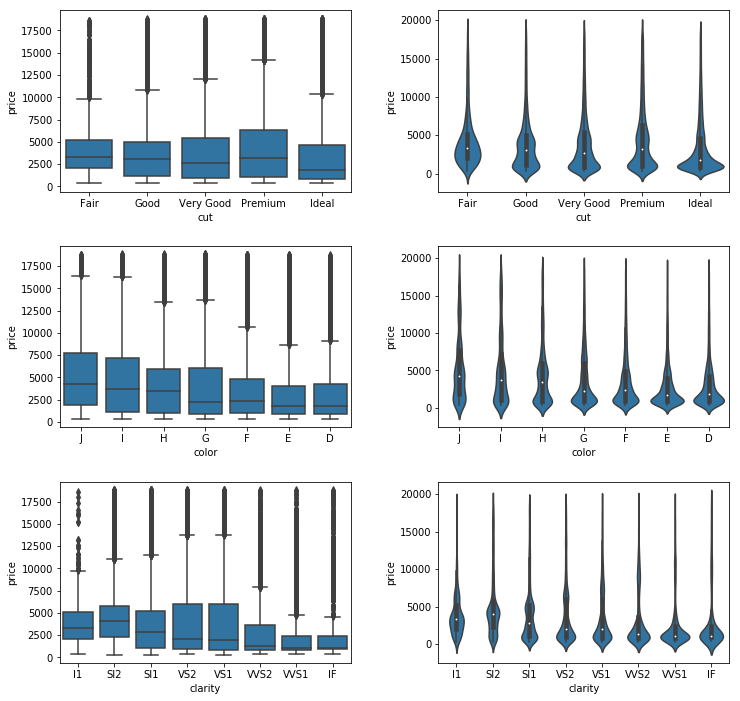

In [42]:
# bivariate plots of price vs. cut, color, clarity
base_color = sb.color_palette()[0]

plt.figure(figsize=[12,12])
plt.subplot(3,2,1)
sb.boxplot(data=diamonds, x='cut', y='price', color=base_color);

plt.subplot(3,2,2)
sb.violinplot(data=diamonds, x='cut', y='price', color=base_color);

plt.subplot(3,2,3)
sb.boxplot(data=diamonds, x='color', y='price', color=base_color);

plt.subplot(3,2,4)
sb.violinplot(data=diamonds, x='color', y='price', color=base_color);

plt.subplot(3,2,5)
sb.boxplot(data=diamonds, x='clarity', y='price', color=base_color);

plt.subplot(3,2,6)
sb.violinplot(data=diamonds, x='clarity', y='price', color=base_color);

plt.subplots_adjust(wspace=0.3, hspace=0.3);

Price vs. Categorical comment 1: <span style="color:blue">There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

Price vs. Categorical comment 2: <span style="color:blue">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

C:\Users\yumen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


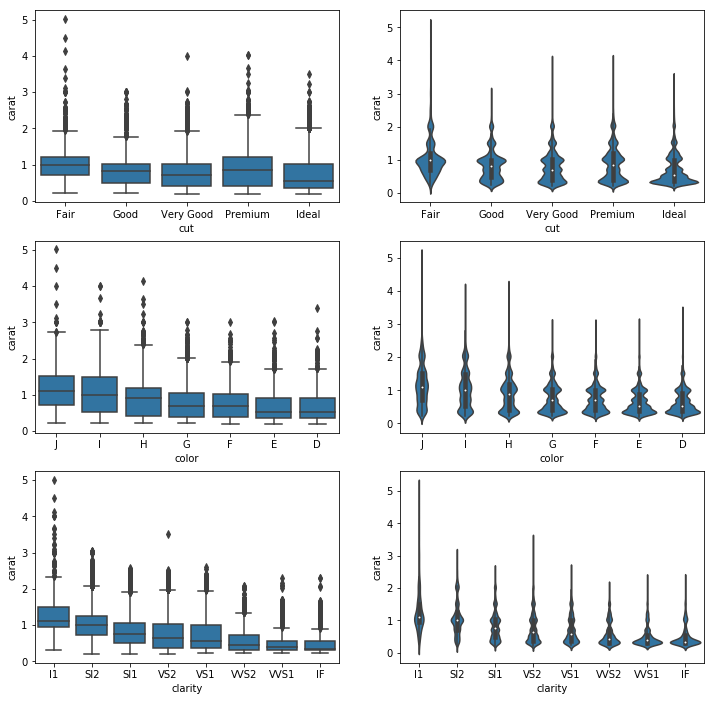

In [43]:
# bivariate plots of carat vs. cut, color, clarity
base_color = sb.color_palette()[0]

plt.figure(figsize=[12,12])
plt.subplot(3,2,1)
sb.boxplot(data=diamonds, x='cut', y='carat', color=base_color);

plt.subplot(3,2,2)
sb.violinplot(data=diamonds, x='cut', y='carat', color=base_color);

plt.subplot(3,2,3)
sb.boxplot(data=diamonds, x='color', y='carat', color=base_color);

plt.subplot(3,2,4)
sb.violinplot(data=diamonds, x='color', y='carat', color=base_color);

plt.subplot(3,2,5)
sb.boxplot(data=diamonds, x='clarity', y='carat', color=base_color);

plt.subplot(3,2,6)
sb.violinplot(data=diamonds, x='clarity', y='carat', color=base_color);


Carat vs. Categorical comment: <span style="color:blue">These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>

<a id='Multivariate_Exploration'></a>
## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

C:\Users\yumen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


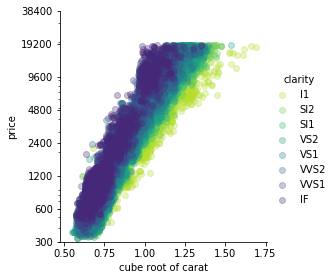

In [24]:
# multivariate plot of price by carat weight, and clarity

def cube_root(x):
    return np.cbrt(x)

y_ticks = [300, 600, 1200, 2400, 4800, 9600, 19200, 38400]

#sb.regplot(x=diamonds.carat.apply(cube_root), y=diamonds.price, fit_reg=False, 
#           scatter_kws={'alpha':0.3});

diamonds['cube_root_carat'] = diamonds.carat.apply(cube_root)

g = sb.FacetGrid(data=diamonds, hue='clarity', size=4, palette='viridis_r');
g.map(sb.regplot, 'cube_root_carat', 'price', x_jitter=0.04, 
     fit_reg=False, scatter_kws={'alpha':0.3});
g.add_legend();

plt.yscale('log');
plt.yticks(y_ticks, y_ticks);
plt.xlabel('cube root of carat');
plt.ylim(300, 38400);

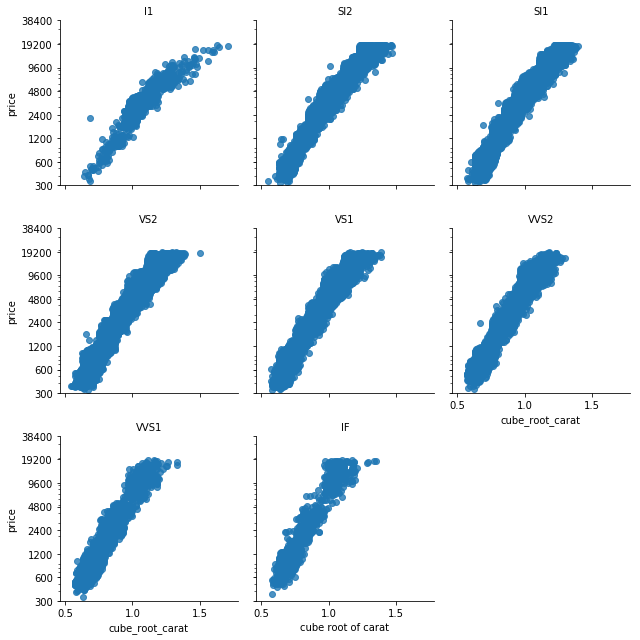

In [25]:
g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=3);
g.map(sb.regplot, 'cube_root_carat', 'price', x_jitter=0.04, 
     fit_reg=False);
plt.yscale('log');
plt.yticks(y_ticks, y_ticks);
plt.xlabel('cube root of carat');
g.set_titles('{col_name}');
plt.ylim(300, 38400);

Price by Carat and Clarity Comment 1: <span style="color:blue">With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

Price by Carat and Clarity Comment 2: <span style="color:blue">You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [26]:
diamonds.cut.nunique(), diamonds.color.nunique()

(5, 7)

In [38]:
#diamonds_subset = diamonds[diamonds.carat >= 0.8 and diamonds.carat <= 1.2 ]
 
diamonds_subset = diamonds.query('carat >= 0.8 and carat <= 1.2 ')

In [43]:
# another way
diamonds_subset = diamonds[(diamonds['carat'] >= 0.8) & (diamonds['carat'] <= 1.2)]

C:\Users\yumen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


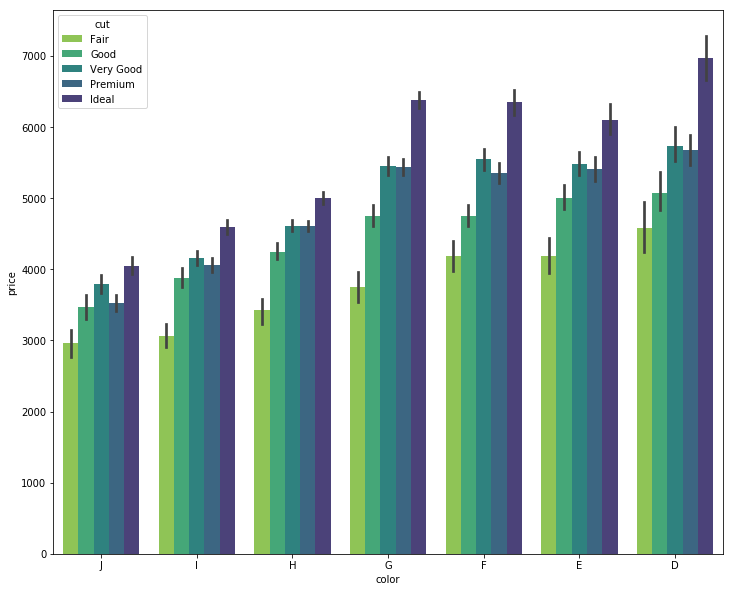

In [44]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
plt.figure(figsize=(12,10))

sb.barplot(data=diamonds_subset, x='color', y='price', hue='cut', palette='viridis_r');

C:\Users\yumen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


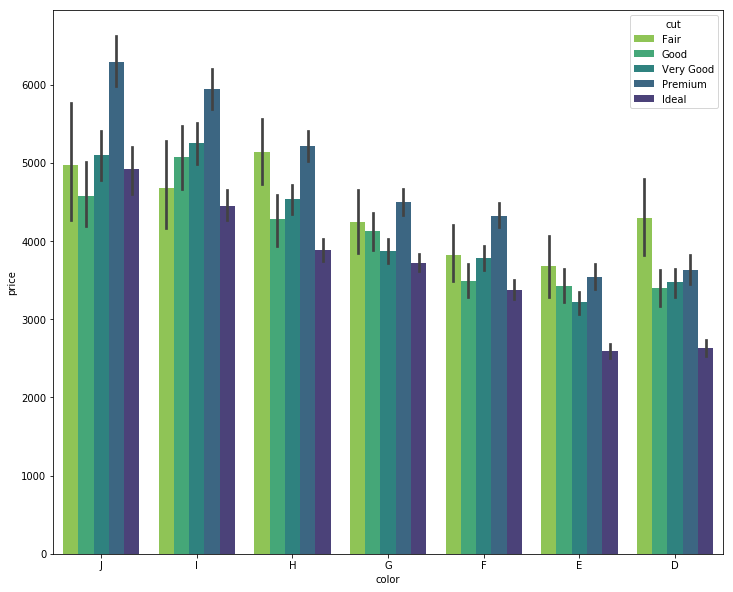

In [42]:
plt.figure(figsize=(12,10))

sb.barplot(data=diamonds, x='color', y='price', hue='cut', palette='viridis_r');

Price by Cut and Color Comment 1: <span style="color:blue">There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.</span>

Price by Cut and Color Comment 2: <span style="color:blue">Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>

<a id='Explanatory_Polishing'></a>
## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [4]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

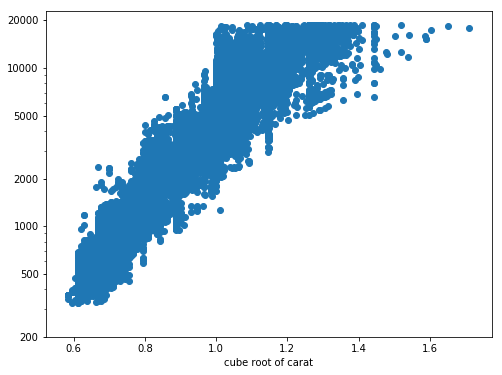

In [9]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log')
y_ticks = [200, 500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(y_ticks, y_ticks);
xtick_loc = np.arange(0.5, diamonds['cr_carat'].max()+0.4, 0.4)
#plt.xticks(xtick_loc, cuberoot_trans(xtick_loc, inverse = True))
plt.show()

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.
- <span style="color:blue">Does the plot has an informative title?</span>
- <span style="color:blue">Are the axis labels informative?</span>
- <span style="color:blue">Are the tick values interpretable?</span>
- <span style="color:blue">Do we need to worry about any of the plot aesthetics?</span>

Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

- <span style="color:blue">The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.</span>
- <span style="color:blue">As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.</span>
- <span style="color:blue">There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.</span>

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [10]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

In [13]:
#another way 
diamonds_1c = diamonds[(diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)]

C:\Users\yumen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


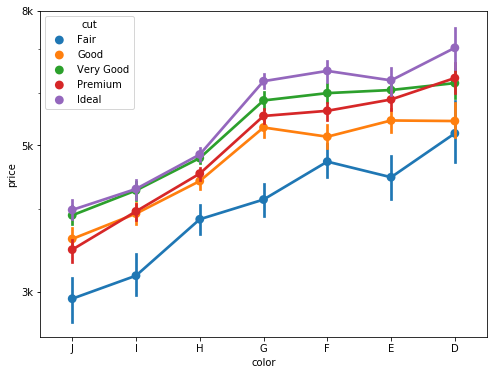

In [14]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();

Price vs. Color, Cut: Polishing comment 1: <span style="color:blue"> Don't forget to provide an informative title and axis labels.</span>

Price vs. Color, Cut: Polishing comment 2: <span style="color:blue"> There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.</span>

> If you want to check your work on the case study against a reference, take a look at the example project in the project lesson! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.